<a href="https://colab.research.google.com/github/ChaitanyaKale7/The-Sparks-Foundation-Tasks/blob/main/Task2_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><b>Task 2<br>
<h3><b>Prediction using Unsupervised ML<br>
<h3><b>From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.<br>
<h3><b>Author: Chaitanya Kale<br>

In [1]:
#Importing the basic libraries
import numpy as np
import pandas as pd

In [2]:
#Importing the iris dataset
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
#Viewing the first five rows from the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Getting the shape of the dataset
iris_df.shape

(150, 4)

The dataset contains 150 rows and 4 columns

In [6]:
#Understanding the data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


The datatype of all the columns in dataset is float <br>
There are no null values in the dataset

In [10]:
# X will contain all the predictor variables
X = iris_df.iloc[:, [0, 1, 2, 3]].values

<h2>Finding optimal number of clusters

In [8]:
import matplotlib.pyplot as plt


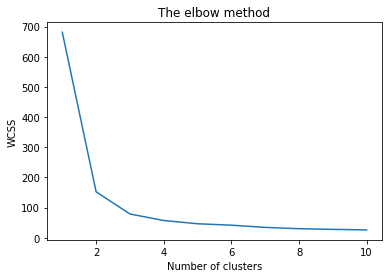

In [11]:
#For finding the number of cluster we will use KMeans
from sklearn.cluster import KMeans


wcss = [] #For each k, we calculate the total within-cluster sum of square (wss).

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 59)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The location of a bend (knee) in the above plot is generally considered as an indicator of the appropriate number of clusters.<br>

Considering this fact we get the optimal number of cluster as 3

In [12]:
# Training the KMeans model with cluster = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 41)
y_kmeans = kmeans.fit_predict(x)

<h2>Visualizing the clusters

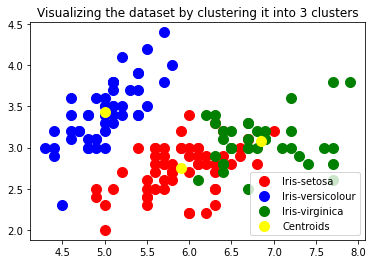

In [13]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.title("Visualizing the dataset by clustering it into 3 clusters")

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()